<a href="https://colab.research.google.com/github/Abrar171041075/Deep-Learning/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

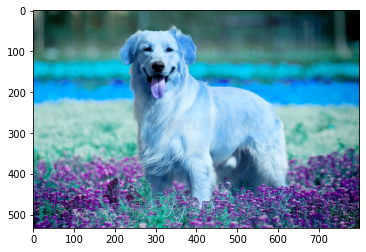

In [23]:
t = cv2.imread("/content/golden-retriever-dog-21668976.jpg")
plt.imshow(t)
plt.show()

In [2]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Dog Image")
    plt.grid(True)
    plt.show()

In [14]:
args = {"image":"/content/golden-retriever-dog-21668976.jpg",
       "scharr":0}

In [5]:
im = cv2.imread(args['image'])

In [7]:
grayimg = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 

In [8]:
grayimg

array([[142, 143, 145, ...,  14,  14,  14],
       [142, 143, 145, ...,  14,  14,  14],
       [142, 143, 145, ...,  14,  14,  13],
       ...,
       [ 59,  52,  38, ...,  14,  27,   8],
       [116,  95,  60, ...,  10,   8,   4],
       [148, 121,  78, ...,   6,   1,  13]], dtype=uint8)

In [9]:
# i. kernel size
kernelSize = -1 if args['scharr'] > 0 else 3

In [10]:
?cv2.Sobel

In [11]:
cv2.imread("/content/golden-retriever-dog-21668976.jpg")

array([[[146, 146, 132],
        [145, 148, 133],
        [147, 150, 135],
        ...,
        [  2,  17,  13],
        [  2,  17,  13],
        [  2,  17,  13]],

       [[146, 146, 132],
        [145, 148, 133],
        [147, 150, 135],
        ...,
        [  2,  17,  13],
        [  2,  17,  13],
        [  2,  17,  13]],

       [[146, 146, 132],
        [145, 148, 133],
        [147, 150, 135],
        ...,
        [  3,  17,  13],
        [  3,  17,  13],
        [  2,  16,  12]],

       ...,

       [[ 68,  28, 116],
        [ 64,  17, 116],
        [ 50,   0, 108],
        ...,
        [  7,  15,  14],
        [ 16,  30,  26],
        [  0,  10,   6]],

       [[116,  92, 164],
        [104,  63, 155],
        [ 81,  19, 133],
        ...,
        [  0,  12,  10],
        [  0,  11,   6],
        [  0,   6,   0]],

       [[144, 129, 187],
        [130,  91, 176],
        [103,  36, 151],
        ...,
        [ 22,   3,   6],
        [  9,   0,   0],
        [ 15,  13,  12]]

In [15]:
gradientX = cv2.Sobel(grayimg, ddepth =cv2.CV_32F, dx =1, dy = 0, ksize = kernelSize)
gradientY = cv2.Sobel(grayimg, ddepth =cv2.CV_32F, dx=0, dy =1, ksize = kernelSize)

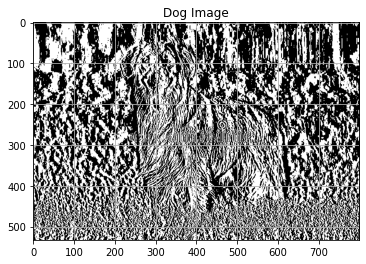

In [16]:
plt_imshow("Gradient X ", gradientX)

In [17]:
gradientX

array([[   0.,   12.,   12., ...,    0.,    0.,    0.],
       [   0.,   12.,   11., ...,    0.,   -1.,    0.],
       [   0.,   12.,   10., ...,   -1.,   -3.,    0.],
       ...,
       [   0., -100.,  -92., ...,   53.,  -13.,    0.],
       [   0., -203., -190., ...,   33.,  -11.,    0.],
       [   0., -252., -242., ...,    8.,    2.,    0.]], dtype=float32)

In [18]:
gradientY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  -1., ...,   0.,  -1.,  -2.],
       [ -4.,  -4.,  -4., ...,  -3.,  -5.,  -6.],
       ...,
       [276., 222., 122., ...,  27.,  21.,  10.],
       [316., 267., 166., ..., -43., -55., -42.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [19]:
gradientX = cv2.convertScaleAbs(gradientX)
gradientY = cv2.convertScaleAbs(gradientY)

In [20]:
gradientX

array([[  0,  12,  12, ...,   0,   0,   0],
       [  0,  12,  11, ...,   0,   1,   0],
       [  0,  12,  10, ...,   1,   3,   0],
       ...,
       [  0, 100,  92, ...,  53,  13,   0],
       [  0, 203, 190, ...,  33,  11,   0],
       [  0, 252, 242, ...,   8,   2,   0]], dtype=uint8)

In [21]:
gradientY

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   1,   2],
       [  4,   4,   4, ...,   3,   5,   6],
       ...,
       [255, 222, 122, ...,  27,  21,  10],
       [255, 255, 166, ...,  43,  55,  42],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

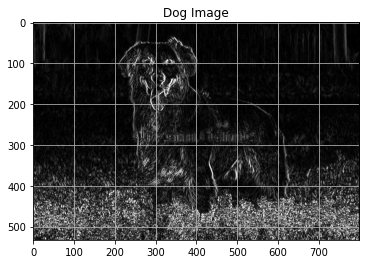

In [24]:
plt_imshow("Gradient X ", gradientX)

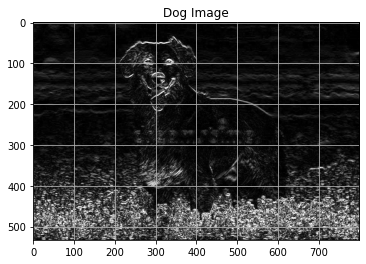

In [25]:
plt_imshow("Gradient Y ", gradientY)

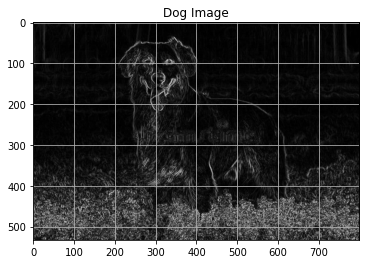

In [30]:
gradientCommbined = cv2.addWeighted(gradientX, 0.6, gradientY, 0.2, 0)
plt_imshow("Gradient Combinned ", gradientCommbined)

In [32]:
gradientX = cv2.Sobel(grayimg, ddepth =cv2.CV_64F, dx =1, dy = 0) # taking upto 64 bit floating point
gradientY = cv2.Sobel(grayimg, ddepth =cv2.CV_64F, dx=0, dy =1)

In [33]:
gradientX

array([[   0.,   12.,   12., ...,    0.,    0.,    0.],
       [   0.,   12.,   11., ...,    0.,   -1.,    0.],
       [   0.,   12.,   10., ...,   -1.,   -3.,    0.],
       ...,
       [   0., -100.,  -92., ...,   53.,  -13.,    0.],
       [   0., -203., -190., ...,   33.,  -11.,    0.],
       [   0., -252., -242., ...,    8.,    2.,    0.]])

In [34]:
gradientY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  -1., ...,   0.,  -1.,  -2.],
       [ -4.,  -4.,  -4., ...,  -3.,  -5.,  -6.],
       ...,
       [276., 222., 122., ...,  27.,  21.,  10.],
       [316., 267., 166., ..., -43., -55., -42.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [35]:
gradientMagnitude = np.sqrt((gradientX**2) + (gradientY**2))

In [36]:
gradientMagnitude

array([[  0.        ,  12.        ,  12.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  12.        ,  11.04536102, ...,   0.        ,
          1.41421356,   2.        ],
       [  4.        ,  12.64911064,  10.77032961, ...,   3.16227766,
          5.83095189,   6.        ],
       ...,
       [276.        , 243.48305896, 152.80052356, ...,  59.48108943,
         24.69817807,  10.        ],
       [316.        , 335.40721519, 252.30140705, ...,  54.20332093,
         56.08921465,  42.        ],
       [  0.        , 252.        , 242.        , ...,   8.        ,
          2.        ,   0.        ]])

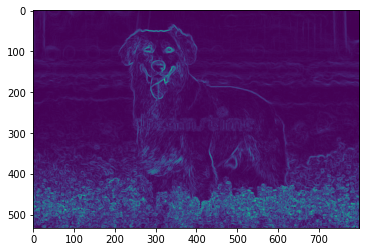

In [38]:
plt.imshow(gradientMagnitude)
plt.show()

In [39]:
gradientOrientation = np.arctan2(gradientX, gradientY) * (180/np.pi)%100

In [41]:
np.min(gradientOrientation)

0.0

In [40]:
np.max(gradientOrientation)

99.99202019855865

In [42]:
gradientOrientation

array([[ 0.        , 90.        , 90.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 90.        , 95.19442891, ...,  0.        ,
        65.        , 80.        ],
       [80.        ,  8.43494882, 11.80140949, ..., 38.43494882,
        50.96375653, 80.        ],
       ...,
       [ 0.        , 75.75079559, 62.98011375, ..., 63.00416161,
        68.24051992,  0.        ],
       [ 0.        , 62.7542857 , 51.14319901, ..., 42.49585764,
        31.30993247, 80.        ],
       [ 0.        , 10.        , 10.        , ..., 90.        ,
        90.        ,  0.        ]])

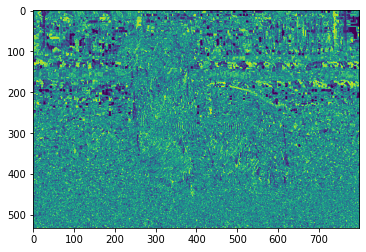

In [43]:
plt.imshow(gradientOrientation)
plt.show()

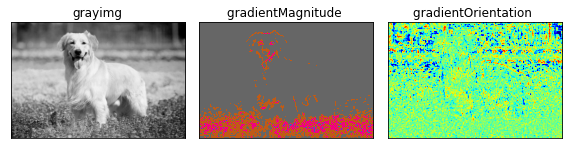

In [48]:
# Plotting in together

(fig, ax) = plt.subplots(nrows=1, ncols=3, figsize = (8, 4))

ax[0].imshow(grayimg, cmap = "gray")
ax[1].imshow(gradientMagnitude, cmap = "Accent_r")
ax[2].imshow(gradientOrientation, cmap = "jet")

ax[0].set_title("grayimg")
ax[1].set_title("gradientMagnitude ")
ax[2].set_title("gradientOrientation ")


for i in range(0, 3):
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    

plt.tight_layout()
plt.show()